In [1109]:
from numbers import Number


MIN_S: Number = 0
MAX_S: Number = 5

MIN_T: Number = 0 
MAX_T: Number = 4




In [1110]:
import numpy as np 

def q_exact(arg_s):
    if 0 <= arg_s <= 2:
        return 1
    
    elif 2 < arg_s <= 5:
        return 2

def kernel(arg_t, arg_s):

    return 1 / (arg_s + arg_t + 2)

def func(arg_t):

    return 2*np.log(arg_t + 7) - np.log(arg_t + 2) - np.log(arg_t + 4)

def inf(arg_s):

    return arg_s



In [1111]:
from typing import Callable, Tuple, List 


def slau_generator(
    ker: Callable,
    func: Callable,
    n_point: int) -> Tuple[np.array, np.array, np.array]:

    grid_s = np.linspace(MIN_S, MAX_S, n_point)
    grid_t = np.linspace(MIN_T, MAX_T, n_point)
    h_s = (MAX_S - MIN_S) / (n_point - 1)
    
    matrix = h_s * np.array( [ [ker(t, grid_s[0]) / 2] + [ker(t, s) for s in grid_s[1:-1]]
                              + [ker(t, grid_s[-1]) / 2] for t in grid_t] )
    target = np.array( [func(t) for t in grid_t] )
    return matrix, target, grid_s


def get_error(
    exact_solution,
    approx_solution,
    grid):

    return max( abs(exact_solution(grid[idx]) - approx_solution[idx]) 
               for idx in range(grid.shape[0]) )


def converage_process(
    mesh_sizes,
    ker,
    func,
    exact_solution) :
    
    errors = list()
    conditions= list()
    solutions= list()
    # singular_max = list()
    # singular_min = list()

    for n_point in mesh_sizes:
        matrix, target, grid = slau_generator(ker, func, n_point)

        # print(np.linalg.det(matrix))
        conditions.append(np.linalg.cond(matrix))
        approx_solution = np.linalg.solve(matrix, target)
        solutions.append((grid, approx_solution))
        errors.append( get_error(exact_solution, approx_solution, grid) )
        # U, s, V = np.linalg.svd(matrix, full_matrices= True)
        # # print(s)
        # print(max(s))
        # print(min(s))
        # singular_max.append(max(s))
        # singular_min.append(min(s))
        # fig = plt.figure()
        # ax = fig.add_subplot()
        # print(len(s))
        # print(np.log(s))
        # ax.plot(np.log(s))
        # plt.ylabel('Логарифм сингулярного числа', fontsize= 12)
        # plt.title('Размерность сетки: ' + str(n_point))
        # plt.savefig('сингулярные числа' + str(n_point))
        # plt.show()
        
    return errors, conditions, solutions


In [1112]:
from matplotlib import pyplot as plt 



In [1113]:
def plot_result(
    x_coords,
    y_coords,
    xlabel,
    ylabel,
    figsize : Tuple[int] = (8, 6)):
    
    plt.figure(
        figsize= figsize
    )
    
    plt.xlabel(
        f'{xlabel}',
        fontsize= 12
    )
    
    plt.ylabel(
        f'{ylabel}',
        fontsize= 12
    )
    
    plt.plot(
        x_coords,
        y_coords,
        # color= 'red'
    )
    plt.title("Шум 10%")
    # plt.grid()
    plt.savefig('Tih5.png')



In [1114]:
# mesh_sizes= 20, 50, 100, 120, 130, 140, 150, 160, 170, 180, 190, 200, 250, 300, 350, 400, 450, 500, 550, 600
# mesh_sizes = np.linspace(0, 500, 51)
mesh_sizes = 20, 50, 100
errors, conditions, solutions = converage_process(
    mesh_sizes, 
    kernel, 
    func, 
    exact_solution= q_exact)

print(errors)

[574.3181564648219, 274.1862709802503, 1684.9889735458667]


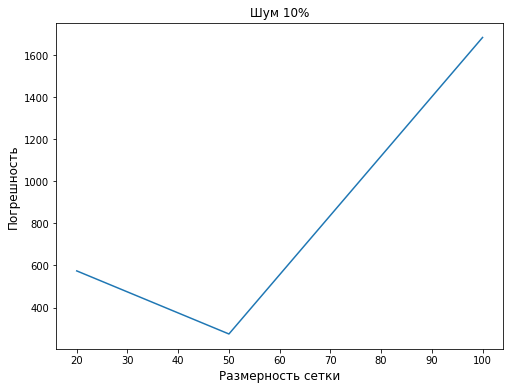

In [1115]:
plot_result(
    x_coords= mesh_sizes,
    y_coords= errors,
    xlabel= 'Размерность сетки',
    ylabel= 'Погрешность'
)



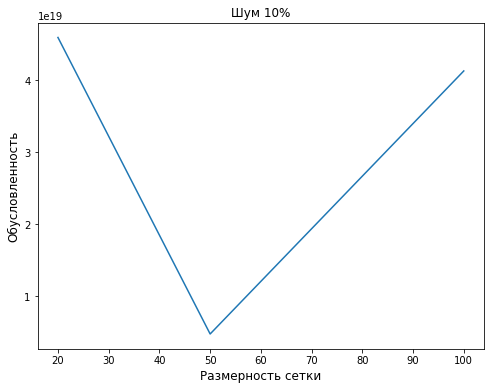

In [1116]:
plot_result(
    x_coords= mesh_sizes,
    y_coords= conditions,
    xlabel= 'Размерность сетки',
    ylabel= 'Обусловленность'
)



In [1117]:
conditions


[4.597319425499832e+19, 4.716440195837536e+18, 4.1314993601646486e+19]

In [1118]:
print(f"Минимальная погршеность: {min(errors)}. \nМаксимальное число обусловленности: {max(conditions)}." )




Минимальная погршеность: 274.1862709802503. 
Максимальное число обусловленности: 4.597319425499832e+19.


In [1119]:
# plot_result(
#     x_coords= solutions[3][0],
#     y_coords= solutions[3][1],
#     xlabel= 'Координата x',
#     ylabel= 'Численное решение для 80 узлов'
# )
#
#
#

In [1120]:
# plot_result(
#     x_coords= solutions[4][0],
#     y_coords= solutions[4][1],
#     xlabel= 'Координата x',
#     ylabel= 'Численное решение для 160 узлов'
# )
#
#
#

In [1121]:
# plot_result(
#     x_coords= solutions[-1][0],
#     y_coords= solutions[-1][1],
#     xlabel= 'Координата x',
#     ylabel= 'Численное решение для 640 узлов'
# )

In [1122]:
n_point = 100



In [1123]:
matrix, f_true, grid = slau_generator(kernel, func, n_point)

np.linalg.cond(matrix)

4.1314993601646486e+19

In [1124]:
def noise_generator(noise_level, f_true):
    noise = 2 * np.random.rand(f_true.size) - 1
    # noise = [ 0.29672384,  0.89679879,  0.32394019, -0.59590013,  0.77587521,  0.80215458,
    #  -0.97822883, -0.87481714, -0.15573482,  0.93820837,  0.46836747,  0.02636181,
    #  -0.5092068,  -0.68210331,  0.69545505, -0.03276671, -0.20351277, -0.67502608,
    #   0.60697412, 0.92507533,  0.3320308,  -0.59430149, -0.3408032,  -0.11054237,
    #  -0.08881155, -0.66380981, -0.89125469, -0.00321755, -0.51517679, -0.46918769,
    #   0.5044113,  -0.3658952,  -0.16620216, 0.09517337, -0.21716945, -0.09960256,
    #   0.80770855, -0.38304193, -0.67456797, -0.18624974, 0.94631067,  0.93182165,
    #   0.96000342,  0.08705131, 0.28388591,  0.27567144, -0.77212493, 0.83227553,
    #   0.99226791, -0.69606992,  0.18104669,  0.09330949, -0.30025647,  0.27339862,
    #   0.44066512,  0.4675609,   0.96373497, -0.86308577, 0.14821563, 0.60239658,
    #   0.67337414, -0.57041606, -0.62161865,  0.56278297,  0.19117157, -0.78753964,
    #  -0.25456562, -0.30186402, -0.82696965,  0.55409843, 0.90435614,  0.10319454,
    #   0.94707833, -0.21604635, -0.99869309,  0.09578786, -0.28484379, -0.86921519,
    #  -0.4016352,  -0.83906778, -0.73366924, -0.05563562,  0.30632869, -0.17683267,
    #   0.35986711, -0.49677676, -0.18576777,  0.73452678 , 0.09561038, -0.9870628,
    #   0.68311495, -0.38079408, -0.10192061,  0.58059355, -0.6275193,  -0.79376574,
    #   0.97740374, -0.60713037,  0.21966948, -0.0253024 ]

    return f_true + noise_level * noise


In [1125]:
errors_noise_case = dict()
levels = 0.01, 0.03, 0.05, 0.1

for noise_level in levels:
    print(2 * np.random.rand(f_true.size) - 1)
    approx_solution = np.linalg.solve(matrix, noise_generator(noise_level, f_true))
    errors_noise_case[noise_level] = get_error(q_exact, approx_solution, grid)

    

[-0.58413435 -0.96354053  0.27321354  0.49614981 -0.52302892  0.97069155
  0.68581603 -0.38352559  0.6017112  -0.88928079 -0.10946661  0.37952639
 -0.28959893  0.42344994  0.83894022  0.29701573  0.9958756   0.03276975
 -0.680417   -0.71785188  0.46111348 -0.6579342   0.85003871 -0.97274759
 -0.03038804 -0.35114804  0.92498465  0.94063743  0.19293498  0.20004231
 -0.63889335 -0.91296733 -0.85617877 -0.46697047 -0.62892338 -0.28785438
 -0.70627258  0.88444964  0.79122005 -0.05103255  0.61434571 -0.86652967
 -0.9233612   0.9906337   0.27200877  0.88685061  0.30925537 -0.51348523
  0.61826244 -0.00352515 -0.94163967 -0.65651619 -0.81203668  0.53154197
  0.69005528 -0.49238495 -0.66555177  0.71846845  0.54320523  0.5935457
  0.40790982  0.31953554 -0.50113335 -0.31595705 -0.33503961 -0.49647091
 -0.80512062 -0.94696066  0.44388864 -0.48473695  0.44043454 -0.387479
  0.34412233  0.46769892  0.87788277  0.48289409 -0.36211735 -0.85840157
  0.95537893 -0.82643342 -0.85527651  0.0446326   0.27

In [1126]:
errors_noise_case



{0.01: 7614285061169792.0,
 0.03: 4.444649886203537e+16,
 0.05: 6.012084732867267e+16,
 0.1: 6.219819371762496e+16}

In [1127]:
approx_solution = np.linalg.solve(matrix, f_true)



In [1128]:
get_error(q_exact, approx_solution, grid)

1684.9889735458667

In [1129]:
print(f"Число обусловленности: {np.linalg.cond(matrix)}")

Число обусловленности: 4.1314993601646486e+19


In [1130]:
def get_partial_solution(
    noise_level,
    amount,
    U,
    s,
    V,
    f):
    
    f = noise_generator(noise_level, f)
    U, s, V = U[:, :amount], s[:amount], V[:amount, :]
        
    approx_solution = U.T @ f 
    approx_solution = np.diag(1 / s) @ approx_solution 
    approx_solution = V.conj().T @ approx_solution 
    
    return approx_solution



def partial_svd(
    noise_level,
    min_amount,
    max_amount,
    matrix,
    f_true,
    grid):
    
    U, s, V = np.linalg.svd(matrix, full_matrices= True)
    errors = list()
    
    for amount in range(min_amount, max_amount + 1):
        approx_solution = get_partial_solution(noise_level, amount, U, s, V, f_true)
        errors.append( get_error(q_exact, approx_solution, grid))
    
    return list(range(min_amount, max_amount + 1)), errors

In [1131]:
amounts, errors = partial_svd(
    noise_level= 0.05,
    min_amount= 1,
    max_amount= 15,
    matrix= matrix,
    f_true= f_true,
    grid= grid    
)

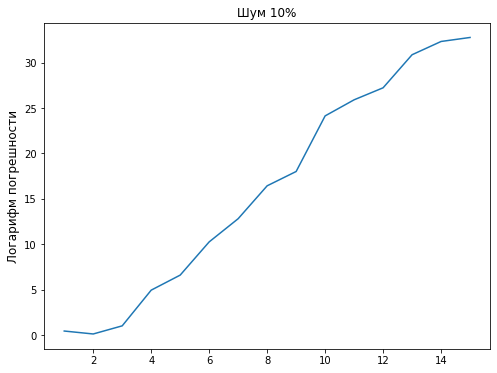

In [1132]:
plot_result(
    x_coords= amounts,
    y_coords= np.log(errors),
    xlabel= "",
    ylabel= "Логарифм погрешности"
)

In [1133]:
def plot_comparison(
    x_coords,
    approx_solve,
    title,
    xlabel = '',
    ylabel = '',
    figsize: Tuple[int] = (8, 6)) :
    
    plt.figure(
        figsize= figsize
    )
    
    plt.xlabel(
        f'{xlabel}',
        fontsize= 14
    )
    
    plt.ylabel(
        f'{ylabel}',
        fontsize= 14
    )
    
    plt.title(
        f'{title}',
        fontsize= 14
    )
    
    plt.plot(x_coords, approx_solve, label= "Численное решение")
    plt.plot(x_coords, list(map(q_exact, x_coords)), label= "Точное решение")
    plt.legend(loc= 'upper left')
    
    # plt.grid()

    plt.savefig('TR_svd_bad5.png')
    
    

In [1134]:
U, s, V = np.linalg.svd(matrix, full_matrices= True)
amount = 4
noise_level = 0.05
approx_solution = get_partial_solution(noise_level, amount, U, s, V, f_true)



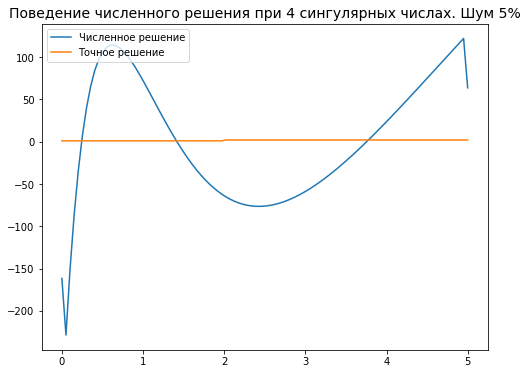

In [1135]:
plot_comparison(
    x_coords= grid,
    approx_solve= approx_solution,
    title= f"Поведение численного решения при {amount} сингулярных числах. Шум {int(noise_level * 100)}%")



In [1136]:
print(f"Погрешность {get_error(q_exact, approx_solution, grid)}.")



Погрешность 229.501138637437.


In [1137]:
amounts, errors = partial_svd(
    noise_level= 0.1,
    min_amount= 1,
    max_amount= 15,
    matrix= matrix,
    f_true= f_true,
    grid= grid    
)



In [1138]:
# plot_result(
#     x_coords= amounts,
#     y_coords= np.log(errors),
#     # xlabel= "Количество сингулярных чисел",
#     xlabel="",
#     ylabel= "Логарифм погрешности"
# )



In [1139]:
U, s, V = np.linalg.svd(matrix, full_matrices= True)
amount = 2
noise_level = 0.1
approx_solution = get_partial_solution(noise_level, amount, U, s, V, f_true)



In [1140]:
# plot_comparison(
#     x_coords= grid,
#     approx_solve= approx_solution,
#     title= f"Поведение численного решения при {amount} сингулярных числах. Шум {int(noise_level * 100)}%"
# )



In [1141]:
print(f"Погрешность {get_error(q_exact, approx_solution, grid)}.")




def Tikhonov_solver(
    matrix,
    f,
    noise_level,
    reg_param):
    noise_level = 0.02
    f = noise_generator(noise_level, f)
    trust_param = 0.2
    approx_solve = np.linalg.solve(
        matrix.T @ matrix + reg_param * np.eye(matrix.shape[0]),
        matrix.T @ f)
    return approx_solve

def find_reg_param(
    matrix,
    f_true,
    grid,
    noise_level):
    
    param_set = np.linspace(0.00001, 0.00002, 100)
    errors = list()
    min = 1000
    min_error = None
    for param in param_set:
        approx_solve = Tikhonov_solver(matrix, f_true, noise_level, param)
        error = get_error(q_exact, approx_solve, grid)
        if min > error:
            min = param
            min_error = error
        errors.append(error)
    print(min)
    print(min_error)
    
    return param_set, errors


def Tikhonov_solver_inf(
    matrix,
    f,
    noise_level,
    reg_param):
    noise_level = 0.02
    f = noise_generator(noise_level, f)
    trust_param = 0.2
    approx_solve = np.linalg.solve(
        matrix.T @ matrix + reg_param * np.eye(matrix.shape[0]) + trust_param * np.eye(matrix.shape[0]),
        matrix.T @ f)
    return approx_solve

def find_reg_param_inf(
    matrix,
    f_true,
    grid,
    noise_level):

    param_set = np.linspace(0.00001, 0.00002, 100)
    errors = list()
    min = 1000
    min_error = None
    for param in param_set:
        approx_solve = Tikhonov_solver_inf(matrix, f_true, noise_level, param)
        error = get_error(q_exact, approx_solve, grid)
        if min > error:
            min = param
            min_error = error
        errors.append(error)
    print(min)
    print(min_error)

    return param_set, errors


Погрешность 1.1181812176654287.


In [1142]:
noise_level= 0.05
param_set, errors = find_reg_param(
    matrix, 
    f_true,
    grid,
    noise_level
)



1e-05
0.9964224098861718


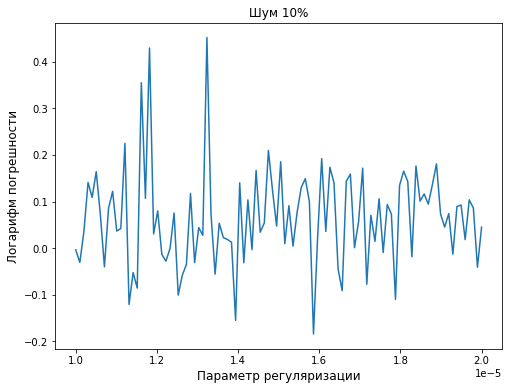

In [1143]:
plot_result(
    x_coords= param_set,
    y_coords= np.log(errors),
    xlabel= "Параметр регуляризации",
    ylabel= f"Логарифм погрешности"
)


In [1144]:
print(param_set[1])

1.0101010101010101e-05


In [1145]:
approx_solution = Tikhonov_solver(matrix, f_true, noise_level, 0.00001)



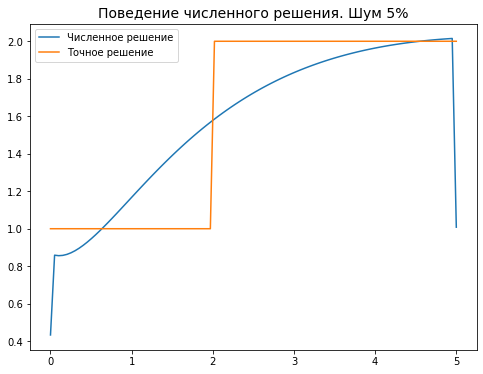

In [1146]:
plot_comparison(
    x_coords= grid,
    approx_solve= approx_solution,
    title= f"Поведение численного решения. Шум {int(noise_level * 100)}%"
)



In [1147]:
print(f"Погрешность {get_error(q_exact, approx_solution, grid)}")

Погрешность 0.9918754058723094


In [1148]:
approx_solution_inf = Tikhonov_solver_inf(matrix, f_true, noise_level, 0.00001)



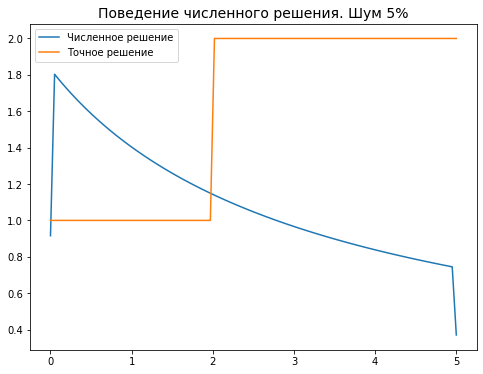

In [1149]:
plot_comparison(
    x_coords= grid,
    approx_solve= approx_solution_inf,
    title= f"Поведение численного решения. Шум {int(noise_level * 100)}%"
)



In [1150]:
print(f"Погрешность {get_error(q_exact, approx_solution_inf, grid)}")


Погрешность 1.6297336266714457


In [1151]:
noise_level= 0.1
param_set, errors = find_reg_param(
    matrix, 
    f_true,
    grid,
    noise_level
)



1e-05
1.1658859229285166


In [1152]:
# plot_result(
#     x_coords= param_set,
#     y_coords= np.log(errors),
#     xlabel= "Параметр регуляризации",
#     ylabel= f"Логарифм погрешности"
# )

In [1153]:
approx_solution = Tikhonov_solver(matrix, f_true, noise_level, param_set[1])



In [1154]:
# plot_comparison(
#     x_coords= grid,
#     approx_solve= approx_solution,
#     title= f"Поведение численного решения. Шум {int(noise_level * 100)}%"
# )



In [1155]:
print(f"Погрешность {get_error(q_exact, approx_solution, grid)}")



Погрешность 1.3735245931334
